In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config

In [76]:
import joblib

In [77]:
set_config(transform_output="pandas")

In [78]:
# data and model paths

data_path = "/content/df_without_outliers.csv"

kmeans_path = "/content/mb_kmeans.joblib"
scaler_path = "/content/scaler.joblib"
encoder_path = "/content/encoder.joblib"
model_path = "/content/model.joblib"

In [79]:
# load the data

df = pd.read_csv(data_path, usecols=["pickup_longitude","pickup_latitude"])

df.shape

(3785362, 2)

In [80]:
# load the scaler and model

scaler = joblib.load(scaler_path)
kmeans = joblib.load(kmeans_path)

In [81]:
scaler

StandardScaler()

In [82]:
kmeans

MiniBatchKMeans(n_clusters=30, n_init=10, random_state=42)

In [83]:
# scale the input data

df_scaled = scaler.transform(df)

df_scaled.head()

,pickup_longitude,pickup_latitude
0,-0.443778,-0.601549
1,-0.182839,-0.777271
2,-0.285388,-2.626699
3,-0.528059,-1.178462
4,0.365612,1.111533


In [84]:
df_scaled_clean = df_scaled.dropna()
predictions = kmeans.predict(df_scaled_clean)
# For numerical features, you can fill NaNs with the mean (or another strategy)
df_scaled_imputed = df_scaled.fillna(df_scaled.mean())
predictions = kmeans.predict(df_scaled_imputed)



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MiniBatchKMeans was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MiniBatchKMeans was fitted without feature names
  warnings.warn(


In [85]:
df_scaled_filled = df_scaled.fillna(df_scaled.mean())
predictions = kmeans.predict(df_scaled_filled)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MiniBatchKMeans was fitted without feature names
  warnings.warn(


In [86]:
df_scaled_clean = df_scaled.fillna(df_scaled.mean())
predictions = kmeans.predict(df_scaled_clean.values)


In [87]:
# Option 1: Fill NaNs with column mean
df_scaled_clean = df_scaled.fillna(df_scaled.mean())

# Option 2: Drop rows with NaNs
# df_scaled_clean = df_scaled.dropna()


In [88]:
predictions = kmeans.predict(df_scaled_clean.values)


In [89]:
predictions = kmeans.predict(df_scaled.fillna(df_scaled.mean()).values)


In [90]:
# get the cluster predictions

# predictions = kmeans.predict(df_scaled)

In [91]:
# add the predictions to data

df['region'] = predictions

df.head()

,pickup_longitude,pickup_latitude,region
0,-73.990372,40.734695,7
1,-73.980782,40.729912,26
2,-73.984550,40.679565,9
3,-73.993469,40.718990,10
4,-73.960625,40.781330,8


In [92]:
# form a region grp

region_grp = df.groupby("region")

In [93]:
# sample the data from each region

sampled_data = (
    region_grp
    .sample(500, random_state=42)
)

In [94]:
sampled_data.shape

(15000, 3)

In [95]:
sampled_data

,pickup_longitude,pickup_latitude,region
7207,-73.944038,40.791832,0
1904649,-73.944878,40.791592,0
1380083,-73.954430,40.805870,0
2000852,-73.962868,40.804523,0
2998546,-73.956909,40.802361,0
...,...,...,...
349600,-73.943001,40.753323,29
1377133,-73.938522,40.752865,29
1588231,-73.953300,40.734028,29
1210809,-73.925468,40.747318,29


In [96]:
# value counts

sampled_data["region"].value_counts()

,count
region,
0,500
1,500
2,500
3,500
4,500
5,500
6,500
7,500
8,500


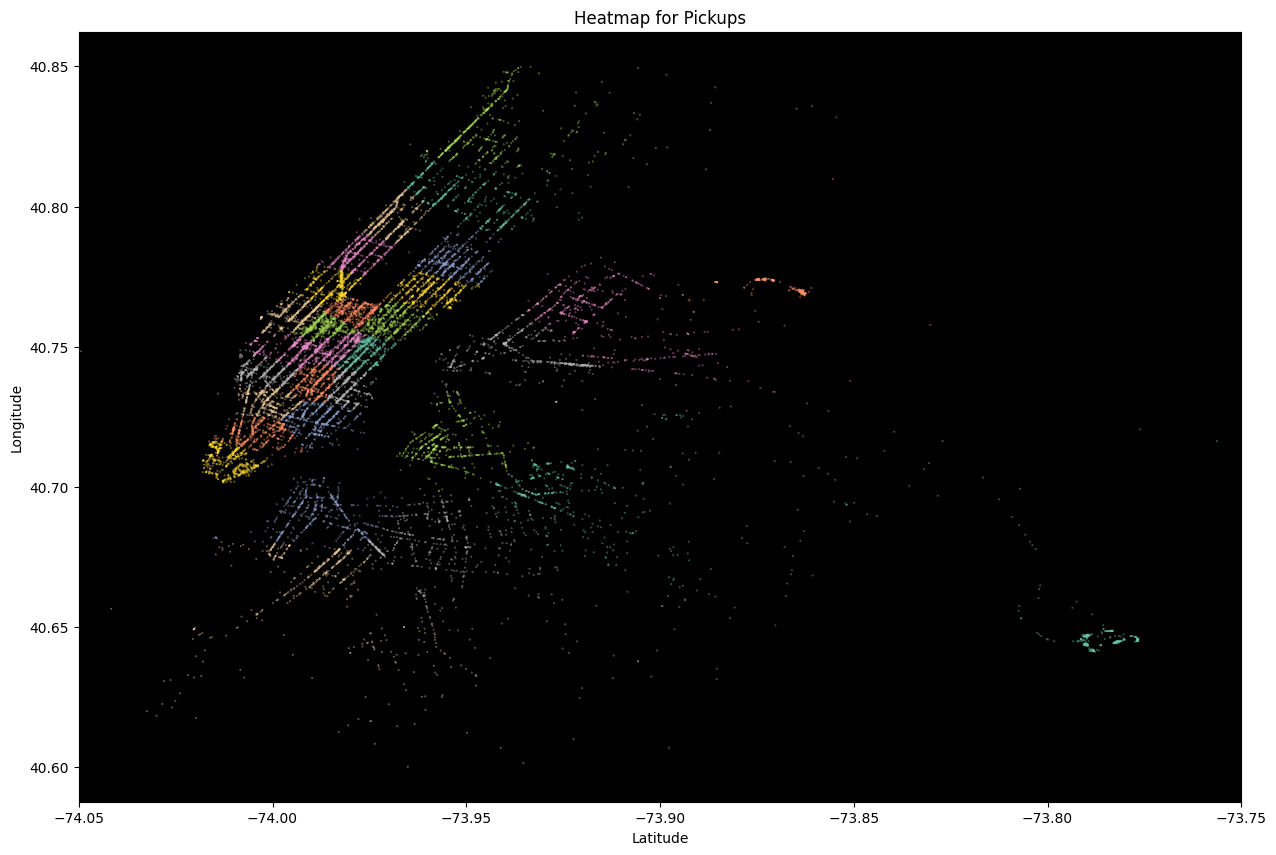

In [97]:
# plot the sampled data on scatterplot

fig,ax = plt.subplots(nrows=1,ncols=1,sharey=True,
                     figsize=(15,10))

ax.set_facecolor('k')
ax.set_xlim(left=-74.05, right=-73.75)

ax.scatter(sampled_data['pickup_longitude'],sampled_data['pickup_latitude'],
           s=0.05,c=sampled_data['region'],cmap="Set2")
ax.set_title('Heatmap for Pickups')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')

plt.show()

In [98]:
# save the sampled data

sampled_data.to_csv("plot_data.csv", index=False)

In [99]:
test_df = pd.read_csv("/content/test.csv")

In [100]:
# split the data

X_test = test_df.drop(columns=["total_pickups"])
y_test = test_df["total_pickups"]

X_test

,tpep_pickup_datetime,lag_1,lag_2,lag_3,lag_4,region,avg_pickups,day_of_week
0,2016-03-01 00:00:00,36.0,44.0,31.0,29.0,0,39.0,1
1,2016-03-01 00:15:00,41.0,36.0,44.0,31.0,0,37.0,1
2,2016-03-01 00:30:00,35.0,41.0,36.0,44.0,0,41.0,1
3,2016-03-01 00:45:00,47.0,35.0,41.0,36.0,0,38.0,1
4,2016-03-01 01:00:00,34.0,47.0,35.0,41.0,0,35.0,1
...,...,...,...,...,...,...,...,...
89275,2016-03-31 22:45:00,22.0,14.0,15.0,13.0,29,16.0,3
89276,2016-03-31 23:00:00,14.0,22.0,14.0,15.0,29,16.0,3
89277,2016-03-31 23:15:00,17.0,14.0,22.0,14.0,29,17.0,3
89278,2016-03-31 23:30:00,18.0,17.0,14.0,22.0,29,15.0,3


In [101]:
encoder = joblib.load(encoder_path)

model = joblib.load(model_path)

In [102]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("encoder", encoder),
    ("model",model)
])

pipe

Pipeline(steps=[('encoder',
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['region', 'day_of_week'])])),
                ('model', LinearRegression())])

In [103]:
encoder

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['region', 'day_of_week'])])

In [104]:
# get the predictions

predictions = pipe.predict(X_test)

In [105]:
# sample row

sample_row = sampled_data.sample(1)

In [106]:
sample_row

,pickup_longitude,pickup_latitude,region
3581823,-73.973282,40.78706,11


In [107]:
# scale the coords

scaled_coords = scaler.transform(sample_row.iloc[:,0:2])

scaled_coords

,pickup_longitude,pickup_latitude
3581823,0.021222,1.322007


In [108]:
# calculate the distances from centroids

distances = kmeans.transform(scaled_coords).values.ravel().tolist()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MiniBatchKMeans was fitted without feature names
  warnings.warn(


In [109]:
distances = list(enumerate(distances))

distances

[(0, 0.8909042400846817),
 (1, 1.4650419874787908),
 (2, 3.6118144988010363),
 (3, 7.274975734359759),
 (4, 2.621481113361509),
 (5, 0.9140601423889647),
 (6, 2.9025363048369632),
 (7, 1.896412802096975),
 (8, 0.5995033361702424),
 (9, 3.583806408457247),
 (10, 2.362187864762193),
 (11, 0.20192202781681287),
 (12, 1.5257422681464077),
 (13, 1.8628345625957305),
 (14, 1.3949023144988635),
 (15, 1.1750300054310114),
 (16, 2.6871082604295458),
 (17, 1.671822729668329),
 (18, 1.0405138902954898),
 (19, 0.6617148831423448),
 (20, 3.039397875196548),
 (21, 0.7472841214958872),
 (22, 2.2230866585230826),
 (23, 0.32367709843036085),
 (24, 4.425105655256841),
 (25, 1.121903057063551),
 (26, 1.903513771337359),
 (27, 1.8805873908153539),
 (28, 4.007105104909844),
 (29, 1.7683047659067084)]

In [110]:
# sort the distances

indexes = [ind[0] for ind in sorted(distances, key=lambda x: x[1])][0:9]

indexes

[11, 23, 8, 19, 21, 0, 5, 18, 25]